In [1]:
import pandas as pd

In [2]:
train_file = './dataset/train.csv'
test_file = './dataset/test.csv'

In [3]:
# read the train data
traindf = pd.read_csv(train_file)
traindf.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [4]:
traindf.target.value_counts()

mohiniyattam     50
odissi           49
kathakali        47
bharatanatyam    47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 10))
plt.hist(traindf.target.values)
plt.show()

<Figure size 1600x1000 with 1 Axes>

In [6]:
testdf = pd.read_csv(test_file)
testdf.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [7]:
trainImagesList = traindf.Image.to_list()
#print(trainImagesList)
testImagesList = testdf.Image.to_list()
#print(testImagesList)

In [8]:
import os
import cv2

def image_loader(folderPath):
    images = []
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        
        if img is not None:
            images.append(img)
        
    return images

In [9]:
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test'

In [10]:
trainImages = image_loader(TRAIN_FOLDER)
testImages = image_loader(TEST_FOLDER)
print(len(trainImages), len(testImages))

364 156


(596, 1061, 3)


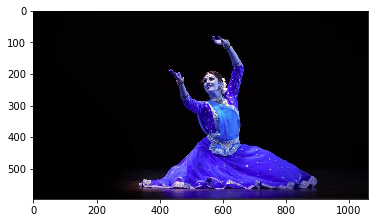

In [11]:
exImage = trainImages[0]
print(exImage.shape)
plt.imshow(exImage)

All are RGB images with random size even more than 1000+ pixels. Suppressing the images more than a certain limit might cause in data lost. Let's resize the images and scale them.

In [12]:
# let's check for 10 random images from the train set
import numpy as np
import random

for _ in range(10):
    n = random.randint(1, len(trainImages))
    print(trainImages[n].shape)

(147, 220, 3)
(194, 259, 3)
(275, 183, 3)
(1035, 770, 3)
(194, 259, 3)
(230, 300, 3)
(600, 900, 3)
(352, 425, 3)
(948, 636, 3)
(263, 350, 3)


In [15]:
meanWidth = 0
meanHeight = 0

for i in range(len(trainImages)):
    meanWidth += trainImages[i].shape[0]
    meanHeight += trainImages[i].shape[1]

meanWidth /= len(trainImages)
meanHeight /= len(trainImages)
print(int(meanWidth), int(meanHeight))

436 458


We can hence choose our input size to be 440*440*3 as it won't affect much.

<h1> Preprocessing </h1>

In [17]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

In [104]:
def preprocessing(imageset):
    # read 3 images to work
    resultant_images = []
    for i in range(len(imageset)):
        
        img = imageset[i]
    
        try:
            print('Original size : ', img.shape)
        except AttributeError:
            print('Shape not found.')
        
        # set up the target shape
        width = 440
        height = 440
        dim = (width, height)
        resultantImage = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    
        # sanity check
        try:
            print('Resized shape: ', resultantImage.shape)
        except AttributeError:
            print('Not preprocessed')
        # normalize the resultant image
        #resultantImage /= 255.0
        # visualize both
        #display(img, resultantImage)
        '''
        # segmentation
        gray = cv2.cvtColor(resultantImage, cv2.COLOR_RGB2GRAY)
        ret, resultantImage = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
        # sanity check
        #display(img, resultantImage)
        # back ground segmentation
    
        kernel = np.ones((3, 3), np.uint8)
        opening = cv2.morphologyEx(resultantImage, cv2.MORPH_OPEN,
                                   kernel, iterations=2)
    
        # sure backgoround area
        sureBg = cv2.dilate(opening, kernel, iterations=3)
        '''
        resultant_images.append(resultantImage)
    
    return resultant_images

In [105]:
processedImages = preprocessing(trainImages)

Original size :  (596, 1061, 3)
Resized shape:  (440, 440, 3)
Original size :  (183, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (157, 250, 3)
Resized shape:  (440, 440, 3)
Original size :  (237, 250, 3)
Resized shape:  (440, 440, 3)
Original size :  (232, 217, 3)
Resized shape:  (440, 440, 3)
Original size :  (219, 231, 3)
Resized shape:  (440, 440, 3)
Original size :  (1169, 826, 3)
Resized shape:  (440, 440, 3)
Original size :  (187, 269, 3)
Resized shape:  (440, 440, 3)
Original size :  (187, 270, 3)
Resized shape:  (440, 440, 3)
Original size :  (177, 284, 3)
Resized shape:  (440, 440, 3)
Original size :  (168, 300, 3)
Resized shape:  (440, 440, 3)
Original size :  (284, 450, 3)
Resized shape:  (440, 440, 3)
Original size :  (183, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (168, 300, 3)
Resized shape:  (440, 440, 3)
Original size :  (259, 194, 3)
Resized shape:  (440, 440, 3)
Original size :  (273, 184, 3)
Resized shape:  (440, 440, 3)
Original size :  (184,

Resized shape:  (440, 440, 3)
Original size :  (183, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (218, 232, 3)
Resized shape:  (440, 440, 3)
Original size :  (360, 480, 3)
Resized shape:  (440, 440, 3)
Original size :  (580, 685, 3)
Resized shape:  (440, 440, 3)
Original size :  (267, 189, 3)
Resized shape:  (440, 440, 3)
Original size :  (194, 259, 3)
Resized shape:  (440, 440, 3)
Original size :  (147, 220, 3)
Resized shape:  (440, 440, 3)
Original size :  (225, 225, 3)
Resized shape:  (440, 440, 3)
Original size :  (192, 262, 3)
Resized shape:  (440, 440, 3)
Original size :  (682, 581, 3)
Resized shape:  (440, 440, 3)
Original size :  (275, 183, 3)
Resized shape:  (440, 440, 3)
Original size :  (600, 819, 3)
Resized shape:  (440, 440, 3)
Original size :  (444, 330, 3)
Resized shape:  (440, 440, 3)
Original size :  (900, 600, 3)
Resized shape:  (440, 440, 3)
Original size :  (142, 355, 3)
Resized shape:  (440, 440, 3)
Original size :  (3384, 2144, 3)
Resized shape:  (440, 

I don't think I shoud apply blurring as there is no such pics in test set. let's try without blurring.

(440, 440, 3)
(440, 440, 3)
(440, 440, 3)
(440, 440, 3)
(440, 440, 3)


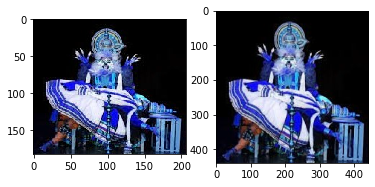

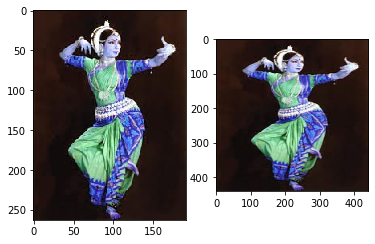

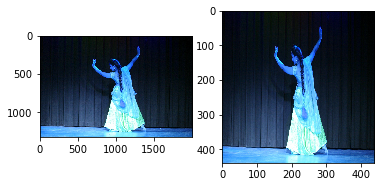

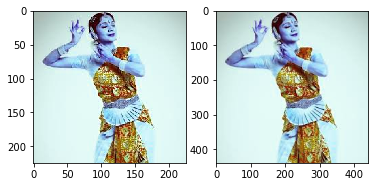

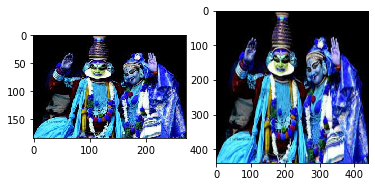

In [83]:
# just pick any random number and cross check 
for _ in range(5):
    j = random.randint(10, 350)
    f, (org, pro) = plt.subplots(1, 2)
    print(processedImages[j].shape)
    pro.imshow(processedImages[j])
    org.imshow(trainImages[j])

<h1> Initial Training </h1>

In [84]:
# Keep in mind, images in dataset have same indexing as of Processed Image list
traindf.head()

,Image,target,ProcessedImages
0,96.jpg,manipuri,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,163.jpg,bharatanatyam,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,450.jpg,odissi,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,219.jpg,kathakali,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,455.jpg,odissi,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [85]:
# processedImages is a list of np arrays of target shape,
# add it to the dataset as column indexing is same as Image col
traindf['ProcessedImages'] = processedImages
traindf.head()

,Image,target,ProcessedImages
0,96.jpg,manipuri,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,163.jpg,bharatanatyam,"[[[30, 34, 35], [30, 34, 35], [30, 34, 35], [3..."
2,450.jpg,odissi,"[[[16, 16, 16], [16, 16, 16], [16, 16, 16], [1..."
3,219.jpg,kathakali,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,455.jpg,odissi,"[[[22, 44, 20], [22, 44, 20], [22, 44, 20], [2..."


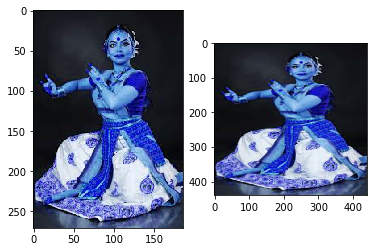

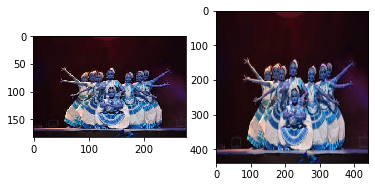

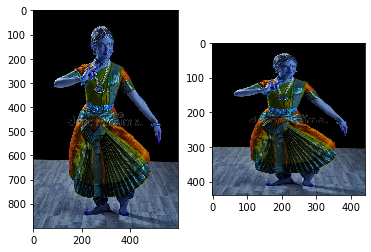

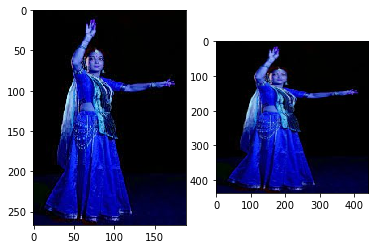

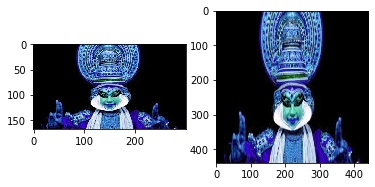

In [86]:
for _ in range(5):
    j = random.randint(10, 350)
    f, (org, pro) = plt.subplots(1, 2)
    pro.imshow(traindf.ProcessedImages[j])
    org.imshow(trainImages[j])

### So, now our features column is 'ProcessedImages' and target column is 'target'. Now what to do of this mulitcalss classification?

In [87]:
traindf.head()

,Image,target,ProcessedImages
0,96.jpg,manipuri,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,163.jpg,bharatanatyam,"[[[30, 34, 35], [30, 34, 35], [30, 34, 35], [3..."
2,450.jpg,odissi,"[[[16, 16, 16], [16, 16, 16], [16, 16, 16], [1..."
3,219.jpg,kathakali,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,455.jpg,odissi,"[[[22, 44, 20], [22, 44, 20], [22, 44, 20], [2..."


In [88]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
label = ohe.fit_transform(np.array(traindf.target.to_list()).reshape(-1, 1))

In [89]:
X_train = np.array(traindf.ProcessedImages.to_list())

In [90]:
X_train.shape

(364, 440, 440, 3)

In [106]:
X_train = X_train/255.0

In [107]:
X_train.shape

(364, 440, 440, 3)

In [91]:
label.shape

(364, 8)

In [108]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X_train, label,
                                     test_size=0.15, random_state=42)
print(Xtr.shape)
print(Xts.shape)
print(ytr.shape)
print(yts.shape)

(309, 440, 440, 3)
(55, 440, 440, 3)
(309, 8)
(55, 8)


In [97]:
from keras.layers import Conv2D, BatchNormalization, Dropout, Dense, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (440, 440, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 438, 438, 32)      896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 438, 438, 32)      128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 436, 436, 32)      9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 436, 436, 32)      128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 218, 218, 32)      25632     
_________________________________________________________________
batch_normalization_17 (Batc (None, 218, 218, 32)      128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 218, 218, 32)     

In [99]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
history = model.fit(Xtr, ytr,
                   batch_size=1, epochs=20,
                   validation_data=(Xts, yts))

Train on 309 samples, validate on 55 samples
Epoch 1/20
309/309 [==============================] - 113s 365ms/step - loss: 454.8493 - accuracy: 0.1974 - val_loss: 99.4693 - val_accuracy: 0.1818
Epoch 2/20
309/309 [==============================] - 101s 326ms/step - loss: 292.0833 - accuracy: 0.2816 - val_loss: 203.8589 - val_accuracy: 0.1273
Epoch 3/20
309/309 [==============================] - 101s 325ms/step - loss: 184.0235 - accuracy: 0.4984 - val_loss: 532.5156 - val_accuracy: 0.1636
Epoch 4/20
309/309 [==============================] - 101s 326ms/step - loss: 156.8783 - accuracy: 0.6375 - val_loss: 421.0316 - val_accuracy: 0.0727
Epoch 5/20
309/309 [==============================] - 101s 327ms/step - loss: 114.3440 - accuracy: 0.6958 - val_loss: 1461.6538 - val_accuracy: 0.0545
Epoch 6/20
309/309 [==============================] - 102s 329ms/step - loss: 94.6816 - accuracy: 0.7670 - val_loss: 467.6247 - val_accuracy: 0.1091
Epoch 7/20
309/309 [==============================] - 10

In [159]:
k = random.randint(1, len(testImages))
testImage = testImages[k]
testImage = cv2.resize(testImage, (440, 440))

In [160]:
testImage.shape

(440, 440, 3)

In [161]:
testImage = np.reshape(testImage, [1, 440, 440, 3])


In [162]:
model.predict_classes(testImage)

array([5], dtype=int64)

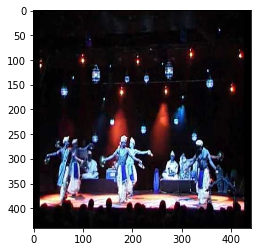

In [163]:
plt.imshow(np.reshape(testImage, [440, 440, 3]))

In [164]:
traindf.target.unique()[model.predict_classes(testImage)]

array(['sattriya'], dtype=object)

In [165]:
testdf.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [166]:
from sklearn.metrics import f1_score

In [185]:
evalImages = np.array(testImages)
type(evalImages)

numpy.ndarray

In [186]:
evalImages.shape

(156,)

In [187]:
Ev = preprocessing(testImages)
Ev.shape

Original size :  (500, 800, 3)
Resized shape:  (440, 440, 3)
Original size :  (246, 205, 3)
Resized shape:  (440, 440, 3)
Original size :  (275, 183, 3)
Resized shape:  (440, 440, 3)
Original size :  (562, 1000, 3)
Resized shape:  (440, 440, 3)
Original size :  (2281, 1931, 3)
Resized shape:  (440, 440, 3)
Original size :  (225, 225, 3)
Resized shape:  (440, 440, 3)
Original size :  (240, 210, 3)
Resized shape:  (440, 440, 3)
Original size :  (275, 183, 3)
Resized shape:  (440, 440, 3)
Original size :  (600, 435, 3)
Resized shape:  (440, 440, 3)
Original size :  (183, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (257, 170, 3)
Resized shape:  (440, 440, 3)
Original size :  (276, 183, 3)
Resized shape:  (440, 440, 3)
Original size :  (177, 284, 3)
Resized shape:  (440, 440, 3)
Original size :  (1280, 864, 3)
Resized shape:  (440, 440, 3)
Original size :  (251, 201, 3)
Resized shape:  (440, 440, 3)
Original size :  (1805, 1654, 3)
Resized shape:  (440, 440, 3)
Original size :  (

Resized shape:  (440, 440, 3)
Original size :  (268, 188, 3)
Resized shape:  (440, 440, 3)
Original size :  (306, 165, 3)
Resized shape:  (440, 440, 3)
Original size :  (906, 602, 3)
Resized shape:  (440, 440, 3)
Original size :  (545, 494, 3)
Resized shape:  (440, 440, 3)
Original size :  (263, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (275, 183, 3)
Resized shape:  (440, 440, 3)
Original size :  (2048, 1366, 3)
Resized shape:  (440, 440, 3)
Original size :  (183, 275, 3)
Resized shape:  (440, 440, 3)
Original size :  (260, 287, 3)
Resized shape:  (440, 440, 3)
Original size :  (167, 301, 3)
Resized shape:  (440, 440, 3)
Original size :  (166, 304, 3)
Resized shape:  (440, 440, 3)
Original size :  (156, 163, 3)
Resized shape:  (440, 440, 3)
Original size :  (269, 188, 3)
Resized shape:  (440, 440, 3)
Original size :  (200, 251, 3)
Resized shape:  (440, 440, 3)
Original size :  (177, 284, 3)
Resized shape:  (440, 440, 3)
Original size :  (225, 225, 3)
Resized shape:  (440, 

AttributeError: 'list' object has no attribute 'shape'

In [190]:
Eva = np.array(Ev)
Eva.shape

(156, 440, 440, 3)

In [192]:
predicted = model.predict_classes(Eva, batch_size=1)

In [193]:
predicted

array([5, 1, 2, 4, 7, 4, 1, 2, 4, 4, 1, 1, 4, 4, 4, 2, 5, 0, 4, 7, 6, 4,
       2, 7, 4, 4, 4, 2, 4, 4, 2, 4, 4, 0, 4, 7, 4, 4, 7, 1, 5, 6, 5, 1,
       4, 1, 4, 4, 4, 5, 1, 2, 4, 1, 7, 1, 5, 5, 5, 6, 4, 7, 4, 4, 1, 5,
       5, 4, 4, 4, 4, 1, 2, 1, 4, 4, 4, 4, 7, 6, 7, 4, 5, 5, 5, 6, 6, 4,
       4, 2, 0, 6, 4, 6, 6, 6, 4, 6, 2, 4, 0, 4, 3, 2, 4, 7, 1, 6, 1, 1,
       5, 5, 1, 4, 0, 7, 4, 2, 7, 4, 0, 6, 6, 7, 6, 1, 7, 4, 3, 0, 4, 2,
       4, 0, 4, 4, 4, 6, 4, 0, 4, 4, 4, 4, 0, 6, 5, 6, 4, 4, 4, 4, 4, 4,
       7, 4], dtype=int64)

In [194]:
classes = traindf.target.unique()
classes

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [203]:
submission = [None] * len(predicted)
for i in range(len(predicted)):
    submission[i] = classes[predicted[i]]

In [204]:
submission

['sattriya',
 'bharatanatyam',
 'odissi',
 'kathak',
 'mohiniyattam',
 'kathak',
 'bharatanatyam',
 'odissi',
 'kathak',
 'kathak',
 'bharatanatyam',
 'bharatanatyam',
 'kathak',
 'kathak',
 'kathak',
 'odissi',
 'sattriya',
 'manipuri',
 'kathak',
 'mohiniyattam',
 'kuchipudi',
 'kathak',
 'odissi',
 'mohiniyattam',
 'kathak',
 'kathak',
 'kathak',
 'odissi',
 'kathak',
 'kathak',
 'odissi',
 'kathak',
 'kathak',
 'manipuri',
 'kathak',
 'mohiniyattam',
 'kathak',
 'kathak',
 'mohiniyattam',
 'bharatanatyam',
 'sattriya',
 'kuchipudi',
 'sattriya',
 'bharatanatyam',
 'kathak',
 'bharatanatyam',
 'kathak',
 'kathak',
 'kathak',
 'sattriya',
 'bharatanatyam',
 'odissi',
 'kathak',
 'bharatanatyam',
 'mohiniyattam',
 'bharatanatyam',
 'sattriya',
 'sattriya',
 'sattriya',
 'kuchipudi',
 'kathak',
 'mohiniyattam',
 'kathak',
 'kathak',
 'bharatanatyam',
 'sattriya',
 'sattriya',
 'kathak',
 'kathak',
 'kathak',
 'kathak',
 'bharatanatyam',
 'odissi',
 'bharatanatyam',
 'kathak',
 'kathak'

In [205]:
testdf.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [210]:
subn = pd.DataFrame()
subn['Image'] = testdf.Image

In [211]:
subn.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [212]:
subn['target'] = submission

In [213]:
subn.head()

,Image,target
0,508.jpg,sattriya
1,246.jpg,bharatanatyam
2,473.jpg,odissi
3,485.jpg,kathak
4,128.jpg,mohiniyattam


In [214]:
subn

,Image,target
0,508.jpg,sattriya
1,246.jpg,bharatanatyam
2,473.jpg,odissi
3,485.jpg,kathak
4,128.jpg,mohiniyattam
...,...,...
151,366.jpg,kathak
152,226.jpg,kathak
153,35.jpg,kathak
154,458.jpg,mohiniyattam


In [215]:
traindf.head()

,Image,target,ProcessedImages
0,96.jpg,manipuri,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,163.jpg,bharatanatyam,"[[[30, 34, 35], [30, 34, 35], [30, 34, 35], [3..."
2,450.jpg,odissi,"[[[16, 16, 16], [16, 16, 16], [16, 16, 16], [1..."
3,219.jpg,kathakali,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,455.jpg,odissi,"[[[22, 44, 20], [22, 44, 20], [22, 44, 20], [2..."


In [216]:
trainImages

[array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [18, 13, 15],
         [18, 13, 15],
         [18, 13, 15]],
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [17, 12, 14],
         [17, 12, 14],
         [17, 12, 14]],
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [14,  9, 11],
         [14,  9, 11],
         [14,  9, 11]]], dtype=uint8), array([[[30, 34, 35],
         [30, 34, 35

In [217]:
for filename in os.listdir(TRAIN_FOLDER):
    print(filename)

1.jpg
10.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
109.jpg
111.jpg
113.jpg
115.jpg
116.jpg
117.jpg
118.jpg
12.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
126.jpg
127.jpg
130.jpg
131.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
139.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
148.jpg
149.jpg
15.jpg
151.jpg
153.jpg
154.jpg
155.jpg
156.jpg
158.jpg
159.jpg
16.jpg
160.jpg
161.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
172.jpg
174.jpg
176.jpg
177.jpg
178.jpg
179.jpg
18.jpg
180.jpg
181.jpg
182.jpg
184.jpg
185.jpg
186.jpg
187.jpg
188.jpg
19.jpg
190.jpg
191.jpg
192.jpg
195.jpg
197.jpg
199.jpg
2.jpg
201.jpg
203.jpg
204.jpg
205.jpg
207.jpg
208.jpg
209.jpg
21.jpg
211.jpg
212.jpg
213.jpg
214.jpg
218.jpg
219.jpg
22.jpg
221.jpg
222.jpg
223.jpg
225.jpg
227.jpg
228.jpg
229.jpg
230.jpg
231.jpg
233.jpg
234.jpg
235.jpg
236.jpg
237.jpg
24.jpg
240.jpg
241.jpg
242.jpg
243.jpg
244.jpg
245.jpg
247.jpg
248.jpg
249.jpg
25.jpg
250.jpg
251.jpg
252.jpg
253.jpg
254.jpg
255.jp

In [218]:
type(subn)

pandas.core.frame.DataFrame

In [227]:
subn.to_csv('submission.csv', index=False)

In [228]:
df = pd.read_csv('submission.csv')

In [229]:
df.head()

,Image,target
0,508.jpg,sattriya
1,246.jpg,bharatanatyam
2,473.jpg,odissi
3,485.jpg,kathak
4,128.jpg,mohiniyattam


In [222]:
subn.head()

,Image,target
0,508.jpg,sattriya
1,246.jpg,bharatanatyam
2,473.jpg,odissi
3,485.jpg,kathak
4,128.jpg,mohiniyattam


In [223]:
testdf.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg
